# LetsGrowMore (LGMVIP) - May 2022

## A.GOWTHAMI - Data Science Intern

## ADVANCED LEVEL TASK

## Task 7 - Next Word Prediction

Using Tensorflow and Keras library train a RNN, to predict the next word. 

DATASET LINK : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

### 1. IMPORTING THE NECESSORY LIBRARIES

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

## 2. IMPORTING THE DATASET

In [2]:
data = '1661-0.txt'
text = open(data,encoding = 'utf-8').read().lower()
print('corpus length : ', len(text))

corpus length :  581888


#### SPLITTING THE DATASET INTO EACH WORD WITHOUT ANY SPECIAL CHARACTERS

In [3]:
tokenizer = RegexpTokenizer(r'[\w]+')
words = tokenizer.tokenize(text)
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'ano

### 3. FEATURE ENGINEERING

In [4]:
# creating a dictionary with each word

unique_w = np.unique(words)
unique_w_i = dict((c,i) for i, c in enumerate(unique_w))

In [5]:
word_len = 5
pre_words = []
next_words = []
for i in range(len(words) - word_len):
    pre_words.append(words[i:i + word_len])
    next_words.append(words[i + word_len])
print(pre_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [6]:
x = np.zeros((len(pre_words), word_len,len(unique_w)), dtype = bool)
y = np.zeros((len(next_words), len(unique_w)), dtype = bool)

In [7]:
for i, each_words in enumerate(pre_words):
    for j, each_word in enumerate(each_words):
        x[i, j, unique_w_i[each_word]] = 1
    y[i, unique_w_i[next_words[i]]] = 1

In [8]:
print(x[0][0])

[False False False ... False False False]


### 4. BUILDING RECURRENT NEURAL NETWORK

#### LSTM MODEL

In [9]:
model = Sequential()
model.add(LSTM(128, input_shape = (word_len,len(unique_w))))
model.add(Dense(len(unique_w)))
model.add(Activation('softmax'))

#### TRAINING THE NEXT WORD PREDICTION MODEL

In [10]:
optimizer = RMSprop(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
history = model.fit(x,y,validation_split = 0.05,batch_size  =128, epochs = 2, shuffle = True).history

Epoch 1/2


C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


811/811 [==============================] - 146s 176ms/step - loss: 5.9967 - accuracy: 0.1085 - val_loss: 6.9683 - val_accuracy: 0.0972
Epoch 2/2
811/811 [==============================] - 229s 283ms/step - loss: 5.7745 - accuracy: 0.1491 - val_loss: 7.9206 - val_accuracy: 0.1051


#### SAVING THE MODEL

In [11]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open('history.p','wb'))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open('history.p','rb'))

### EVALUATING THE NEXT WORD PREDICTION MODEL

##### BASED ON ACCURACY

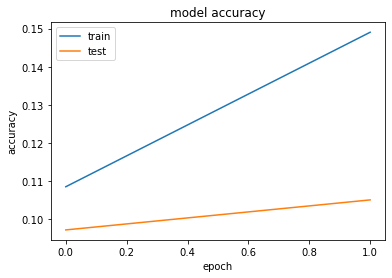

In [12]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')

##### BASED ON ITS LOSS CHANGES WHILE TRAINING

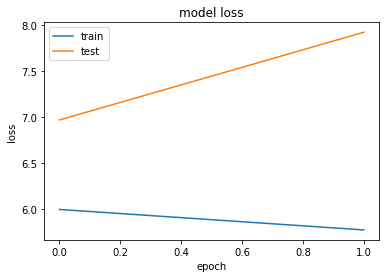

In [13]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')

### TESTING NEXT WORD PREDICTION MODEL

In [14]:
def prepare_input(text):
    X = np.zeros((1,word_len, len(unique_w)))
    for t, word in enumerate(text.split()):
        print(word)
        X[0, t, unique_w_i[word]] = 1
    return X
prepare_input("This is an example".lower())

this
is
an
example


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#### CHOOSING THE BEST POSSIBLE 'n' WORDS

In [15]:
def sample(preds, top_n = 3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

#### CREATING A FUNCTION FOR NEXT WORD PREDICTION

In [16]:
def predict_completion(text, n = 3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose = 0)[0]
    next_indices = sample(preds, n)
    return [unique_w[idx] for idx in next_indices]

#### USING THE FOLLOWING QUOTE SEQUENCE AS A BASE FOR OUR PREDICTION

In [17]:
quote = [
    "Attitude is a little thing that makes a big difference.",
    "That which does not kill us makes us stronger.",
    "Light the candle instead of cursuing darkness.",
    "Are you lost baby girl?",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
    
]

#### USING THE MODEL TO PREDICT THE NEXT WORD

In [18]:
for q in quote:
    seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
    print("Sequence: ",seq)
    print("\n next possible words: ", predict_completion(seq,5))

Sequence:  attitude is a little thing
attitude
is
a
little
thing

 next possible words:  ['for', 'but', 'and', 'to', 'in']
Sequence:  that which does not kill
that
which
does
not
kill

 next possible words:  ['to', 'it', 'the', 'i', 'you']
Sequence:  light the candle instead of
light
the
candle
instead
of

 next possible words:  ['the', 'my', 'his', 'a', 'this']
Sequence:  are you lost baby girl
are
you
lost
baby
girl

 next possible words:  ['and', 'i', 'it', 'to', 'in']
Sequence:  it is hard enough to
it
is
hard
enough
to

 next possible words:  ['see', 'be', 'the', 'think', 'know']
